In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from pylab import rcParams

from wordcloud import WordCloud

import nltk
from nltk import word_tokenize, PorterStemmer, StanfordTokenizer
from nltk.corpus import stopwords

%matplotlib inline  
rcParams['figure.figsize'] = 12, 18

First we load emails and initialize a wordcloud instmance

In [2]:
emails = pd.read_csv("hillary-clinton-emails/Emails.csv")

In [3]:
wc = WordCloud(background_color="white")

According to the data schema from kaggle we should use 'ExtractedBodyText' as "Attempt to only pull out the text in the body that the email sender wrote". However the interesting part can be forwarded by someone and still represents the intereset for analysis.

In [4]:
text = ' '.join(emails['RawText'].dropna())

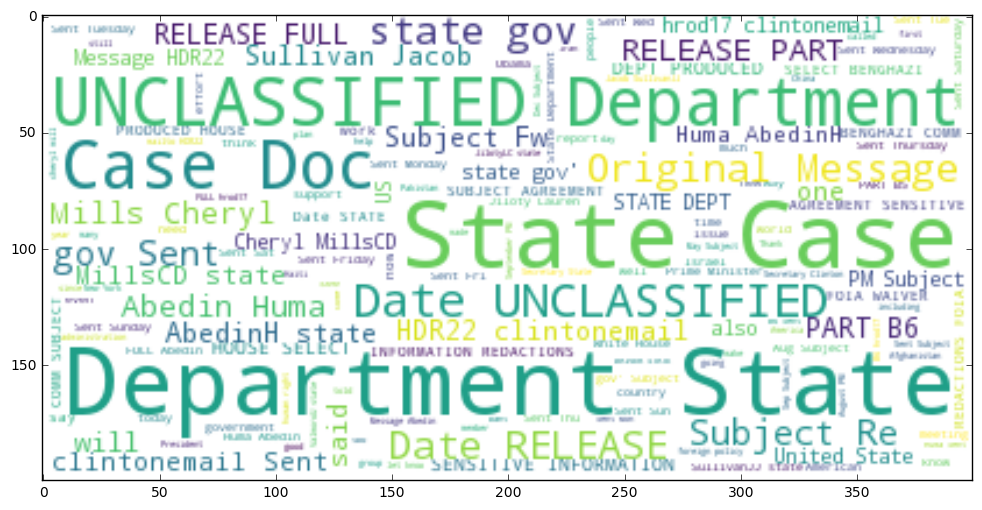

In [5]:
wc.generate(text)
plt.imshow(wc)

We see some duplicates as well stopwords in this result. Now we can try to implement a standard pipline where we perform tokenization, remove stopwords and apply steaming.

In [6]:
porter = nltk.PorterStemmer()
customstopwords = stopwords.words('english')
customstopwords = customstopwords + ['nan','call', 'know', 'would', 'get', 'time', 'work', 'like', 'today', 
                                     'see', 'morning', 'also', 'back', 'tomorrow', 'meeting', 'think', 
                                     'good', 'want', 'could', 'working', 'well', 'fw', 'fyi', 're', 'pm', 'h',
                                     'subject',
                                     'a','about','above','across','after','again','against','all','almost',
                                     'alone','along','already','also','although','always','among','an','and',
                                     'another','any','anybody','anyone','anything','anywhere','are','area',
                                     'areas','around','as','ask','asked','asking','asks','at','away','b','back',
                                     'backed','backing','backs','be','became','because','become','becomes','been',
                                     'before','began','behind','being','beings','best','better','between','big',
                                     'both','but','by','c','came','can','cannot','case','cases','certain',
                                     'certainly','clear','clearly','come','could','d','did','differ','different',
                                     'differently','do','does','done','down','down','downed','downing','downs',
                                     'during','e','each','early','either','end','ended','ending','ends','enough',
                                     'even','evenly','ever','every','everybody','everyone','everything',
                                     'everywhere','f','face','faces','fact','facts','far','felt','few','find',
                                     'finds','first','for','four','from','full','fully','further','furthered',
                                     'furthering','furthers','g','gave','general','generally','get','gets','give',
                                     'given','gives','go','going','good','goods','got','great','greater','greatest',
                                     'group','grouped','grouping','groups','h','had','has','have','having','he','her',
                                     'here','herself','high','high','high','higher','highest','him','himself','his',
                                     'how','however','i','if','important','in','interest','interested','interesting',
                                     'interests','into','is','it','its','itself','j','just','k','keep','keeps','kind',
                                     'knew','know','known','knows','l','large','largely','last','later','latest',
                                     'least','less','let','lets','like','likely','long','longer','longest','m',
                                     'made','make','making','man','many','may','me','member','members','men',
                                     'might','more','most','mostly','mr','mrs','much','must','my','myself',
                                     'n','necessary','need','needed','needing','needs','never','new','new',
                                     'newer','newest','next','no','nobody','non','noone','not','nothing',
                                     'now','nowhere','number','numbers','o','of','off','often','old','older',
                                     'oldest','on','once','one','only','open','opened','opening','opens','or',
                                     'order','ordered','ordering','orders','other','others','our','out','over',
                                     'p','part','parted','parting','parts','per','perhaps','place','places',
                                     'point','pointed','pointing','points','possible','present','presented',
                                     'presenting','presents','problem','problems','put','puts','q','quite','r',
                                     'rather','really','right','right','room','rooms','s','said','same','saw',
                                     'say','says','second','seconds','see','seem','seemed','seeming','seems',
                                     'sees','several','shall','she','should','show','showed','showing','shows',
                                     'side','sides','since','small','smaller','smallest','so','some','somebody',
                                     'someone','something','somewhere','state','states','still','still','such',
                                     'sure','t','take','taken','than','that','the','their','them','then','there',
                                     'therefore','these','they','thing','things','think','thinks','this','those',
                                     'though','thought','thoughts','three','through','thus','to','today','together',
                                     'too','took','toward','turn','turned','turning','turns','two','u','under',
                                     'until','up','upon','us','use','used','uses','v','very','w','want',
                                     'wanted','wanting','wants','was','way','ways','we','well','wells','went','were',
                                     'what','when','where','whether','which','while','who','whole','whose','why',
                                     'will','with','within','without','work','worked','working','works','would','x',
                                     'y','year','years','yet','you','young','younger','youngest','your','yours','z']


tokens = [token for sent in nltk.sent_tokenize(text) for token in nltk.word_tokenize(sent)]
# text = nltk.Text(tokens)
words = [w.lower() for w in tokens]
wordswostop = [w for w in words if w not in customstopwords]
wordsclean = [porter.stem(w) for w in wordswostop]

We can compare number of tokens before and after removing stopwords

In [7]:
len(tokens), len(wordswostop)

(3665281, 2227291)

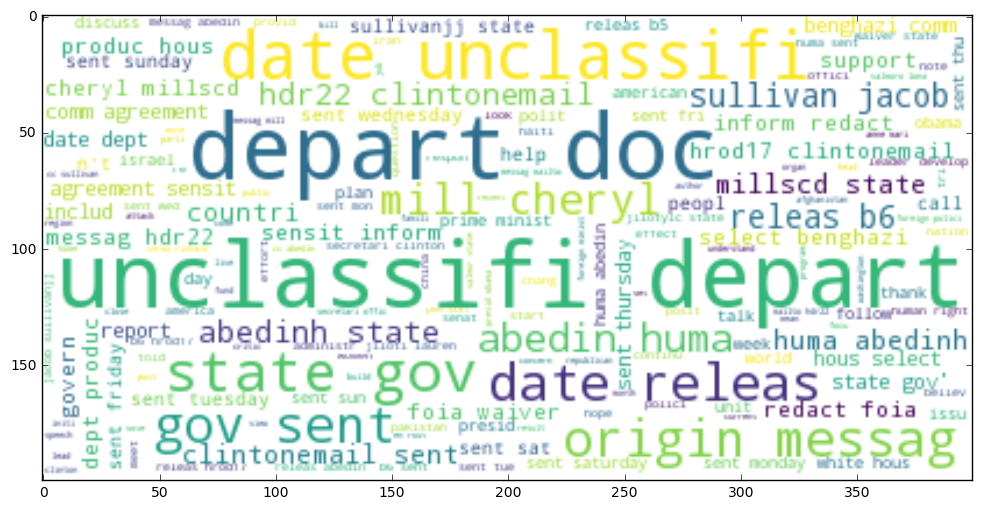

In [8]:
textclean = ' '.join(wordsclean)
wc.generate(textclean)
plt.imshow(wc)
plt.show()

As we can see we were not able to remove many duplicates. At the same time we also lost the endings and introduced additional ambiguity. Overall we cannot say the results are sugnificant better than before.
One thing would be to compare what kind of tokens we have for duplicates. As an example we can check all occurences of 'gov' where lots of tokens have a variaty of forms including punctuation. We assume such tokens can be differently handeled in wordcloud library.

In [9]:
set(w for w in wordswostop if 'gov' in w and len(w)>3)

{"'abedinh©state.gov'",
 "'campbelikm©state.gov'",
 "'hanleymrgastategov'",
 "'jilotylc©state.gov",
 "'jilotylc©state.gov'",
 "'jilotylc©state.govl",
 "'russorv©state.gov'",
 "'valmorou©state.gov",
 "'valmorou©state.gov'",
 '-government',
 '-governor',
 '.3state.gov',
 '.gov.br/sedh',
 '.gove.ftn',
 '.‹suilivan1j©st.ate.gov',
 '//blog.usaid.gov/2010/09/1000-days-partnering-to-reduce-child-undernutrition/',
 '//blogs.abcnews.com/thenote/2010/09/gov-barbour-no-excuse-for-koran-burning-stirring-up-anti-',
 '//blogs.state.gov',
 '//blogs.state.gov/index.phasite/entry/1000',
 '//democrats.senate.govicalendar/',
 '//finance.senate.gov/press/bpress/2009press/prb062009.pdf',
 '//fpc.state.gov/documents/organization/80250.pdf',
 '//fpc.state.gov/documents/organizdion/80250.pctf',
 '//frwebgate.access.gpo.gov/cgi-',
 '//frwebgate.access.gpo.gov/cgi-bin/getdoc.cgi',
 '//frwebgatearess.gpo.govicgi-',
 '//frwebgge.axess.gpo.govicgi-bin/getdoc.cgi',
 '//go.usa.gov/cim',
 '//haiti.usembassy.gov/',
 '